<a href="https://colab.research.google.com/github/aman-jnu/Machine-Learning/blob/main/ComputerVisionToClassifyClothes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

print(f"torchversion: {torch.__version__} \n torchvisionversion: {torchvision.__version__}")

torchversion: 2.2.1+cu121 
 torchvisionversion: 0.17.1+cu121


In [3]:
train_data = datasets.FashionMNIST(
    root="data",
    train= True,
    download = True,
    transform = ToTensor(),
    target_transform= None

)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

len(train_data) , len(test_data)

100%|██████████| 26421880/26421880 [00:02<00:00, 9019879.54it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 170365.48it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3198735.40it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15657923.85it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



(60000, 10000)

In [4]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
image.shape

torch.Size([1, 28, 28])

In [6]:
class_names= train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Text(0.5, 1.0, 'Ankle boot')

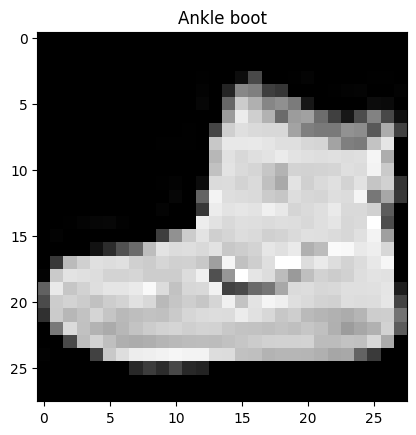

In [7]:
plt.imshow(image.squeeze() , cmap="gray")
plt.title(class_names[label])

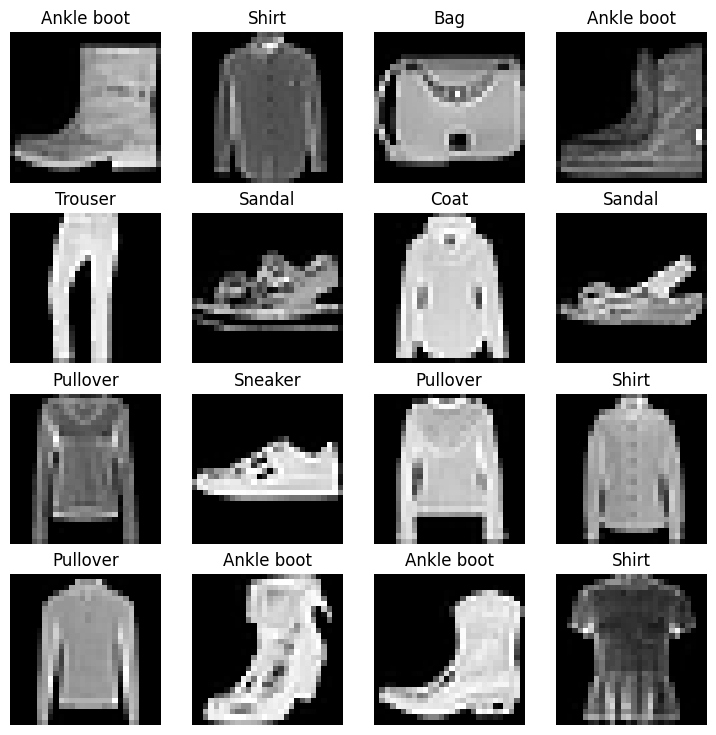

In [8]:
import torch
torch.manual_seed(42)

fig = plt.figure(figsize=(9,9))
rows, column = 4, 4

for i in range(1, rows*column+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, column, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)


In [9]:
from torch.utils.data import DataLoader

BATCH_SIZE= 32

train_dataloader = DataLoader(train_data,
                              batch_size= BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(
    test_data,
    batch_size = BATCH_SIZE,
    shuffle = False
)

train_dataloader , test_dataloader , len(train_dataloader), len(test_dataloader)

(<torch.utils.data.dataloader.DataLoader at 0x78901f08a7d0>,
 1875,
 313)

In [10]:
train_feature_batch, train_label_batch = next(iter(train_dataloader))
train_feature_batch.shape , train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [11]:
import torch
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [18]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.block1 = nn.Sequential(
        nn.Conv2d( in_channels=input_shape,
                  out_channels= hidden_units,
                   kernel_size=3,
                   stride=1,
                   padding=1

        ),
        nn.ReLU(),

        nn.Conv2d(
            in_channels= hidden_units,
            out_channels= hidden_units,
            kernel_size=3,
            stride= 1,
            padding= 1
        ),
        nn.ReLU(),

        nn.MaxPool2d(
            kernel_size=2,
            stride=2
        )
    )

    self.block2= nn.Sequential(
        nn.Conv2d(
            in_channels= hidden_units,
            out_channels= hidden_units,
            kernel_size=3,
            padding=1
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels= hidden_units,
            kernel_size=3,
            padding = 1
        ),
        nn.ReLU(),
        nn.MaxPool2d(
            kernel_size= 2,
            stride=2
        )
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(
            in_features= hidden_units*7*7,
            out_features= output_shape
        )
    )

  def forward(self, x:torch.Tensor):
      x= self.block1(x)
      x= self.block2(x)
      x= self.classifier(x)
      return x


model0= FashionMNISTModelV0(
    input_shape= 1,
    hidden_units=10,
    output_shape= len(class_names)
).to(device)

model0


FashionMNISTModelV0(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [13]:
# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 0.9054,  1.7207,  0.3226,  ...,  0.7192, -1.9300,  0.9975],
         [-1.3778,  1.1541, -1.0930,  ..., -1.6579, -0.2273,  0.6312],
         [-0.1582, -0.1997,  0.4665,  ...,  0.9779,  0.0749, -1.8820],
         ...,
         [ 2.1541, -0.4406,  0.4130,  ...,  1.4281,  0.5892,  0.5351],
         [ 0.9576,  0.7547, -0.5769,  ..., -0.4550, -0.1706,  0.2869],
         [-0.3016,  1.8739,  1.9960,  ...,  0.2647,  1.2986,  2.1888]],

        [[-0.8007,  0.7255,  1.0275,  ...,  0.4921, -0.5641, -0.2847],
         [ 0.8095, -0.2823,  0.1293,  ...,  0.4571, -1.4685,  1.4673],
         [ 0.6515,  1.5573,  1.1760,  ..., -0.4621,  1.2217, -1.0239],
         ...,
         [ 0.5091, -0.5653, -0.2643,  ...,  1.7447, -1.7066, -0.0449],
         [ 0.1754, -1.0075,  1.3400,  ..., -0.9695, -0.3480,

In [29]:
loss_fn = nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params=model0.parameters(),
                           lr=0.01)

In [15]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [16]:
model0.state_dict()

OrderedDict([('block1.0.weight',
              tensor([[[[-0.1536, -0.0391, -0.1354],
                        [ 0.2211, -0.2631, -0.1537],
                        [-0.0941, -0.2004,  0.0315]]],
              
              
                      [[[-0.3292,  0.3010, -0.2832],
                        [ 0.2573,  0.0555, -0.1082],
                        [ 0.2060,  0.0520,  0.2693]]],
              
              
                      [[[ 0.0364, -0.1051,  0.0896],
                        [-0.0904,  0.1403,  0.2976],
                        [ 0.1927, -0.1457,  0.1924]]],
              
              
                      [[[ 0.0596,  0.1693, -0.2032],
                        [-0.3300, -0.1288, -0.2557],
                        [ 0.2735,  0.0960,  0.1381]]],
              
              
                      [[[ 0.1054, -0.0058,  0.2609],
                        [-0.2368,  0.0210, -0.2275],
                        [ 0.1028, -0.1148,  0.1021]]],
              
              
            

In [32]:
torch.manual_seed(42)
!pip install tqdm
from tqdm.auto import tqdm
from timeit import default_timer as timer

from helper_functions import accuracy_fn

epochs = 3

for epoch in tqdm(range(epochs)):
  train_loss = 0
  for batch, (X,y) in enumerate(train_dataloader):
    X, y = X.to(device), y.to(device)
    y_pred = model0(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    train_loss /= len(train_dataloader)



  model0.eval()
  test_loss_total = 0
  with torch.inference_mode():

    for batch, (X_test, y_test) in enumerate(test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)
      test_pred = model0(X_test)
      test_loss = loss_fn(test_pred, y_test)
      test_loss_total += test_loss

    test_loss_total /= len(test_dataloader)

  print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss_total:.3f}")





  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 | Loss: 0.000 | Test loss: 0.740
Epoch: 1 | Loss: 0.000 | Test loss: 0.514
Epoch: 2 | Loss: 0.000 | Test loss: 0.429


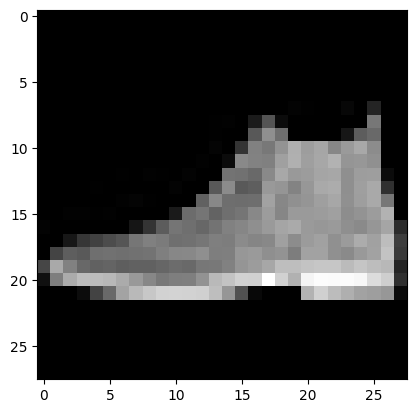

In [33]:
plt.imshow(test_data[0][0].squeeze(), cmap="gray")

In [34]:
model_pred_logits = model0(test_data[0][0].unsqueeze(dim=0).to(device))
model_pred_probs = torch.softmax(model_pred_logits, dim=1)
model_pred_label = torch.argmax(model_pred_probs, dim=1)
model_pred_label

tensor([9], device='cuda:0')

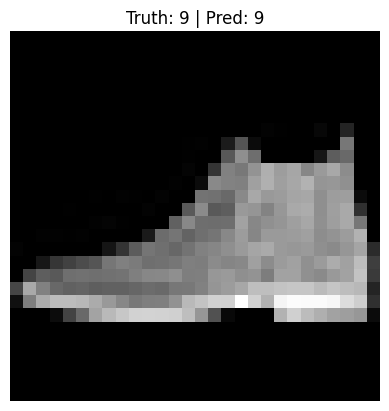

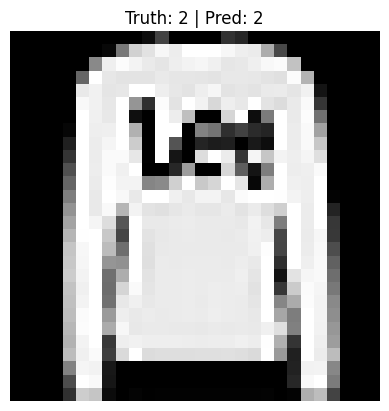

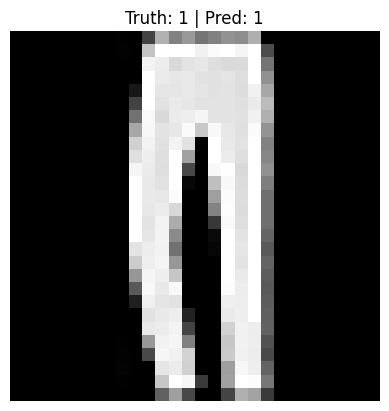

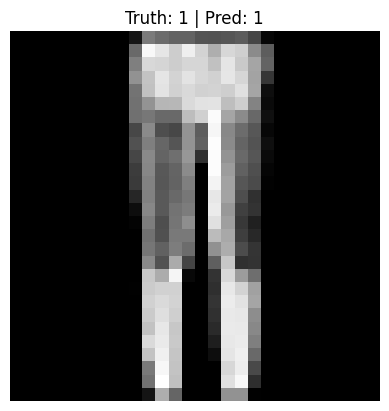

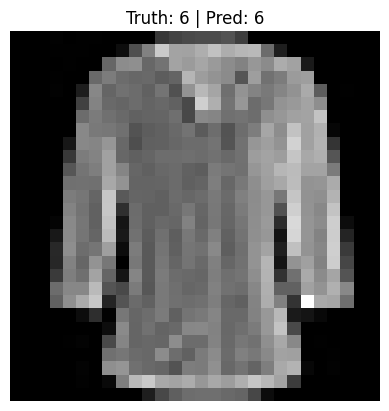

In [36]:
num_to_plot = 5
for i in range(num_to_plot):
  img = test_data[i][0]
  label = test_data[i][1]

  model_pred_logits = model0(test_data[i][0].unsqueeze(dim=0).to(device))
  model_pred_probs = torch.softmax(model_pred_logits, dim=1)
  model_pred_label = torch.argmax(model_pred_probs, dim=1)

  plt.figure()
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(f"Truth: {label} | Pred: {model_pred_label.cpu().item()}")
  plt.axis(False);

In [37]:

# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 75.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [38]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19

0.23.1


In [39]:
from tqdm.auto import tqdm
model0.eval()
y_preds = []

with torch.inference_mode():
  for batch, (X, y) in tqdm(enumerate(test_dataloader)):
    X, y = X.to(device), y.to(device)

    y_pred_logits = model0(X)
    y_pred_label = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)
    y_preds.append(y_pred_label)

  y_preds = torch.cat(y_preds).cpu()

len(y_preds)

0it [00:00, ?it/s]

10000

In [41]:
test_data.targets[:10], y_preds[:10]

(tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]),
 tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]))

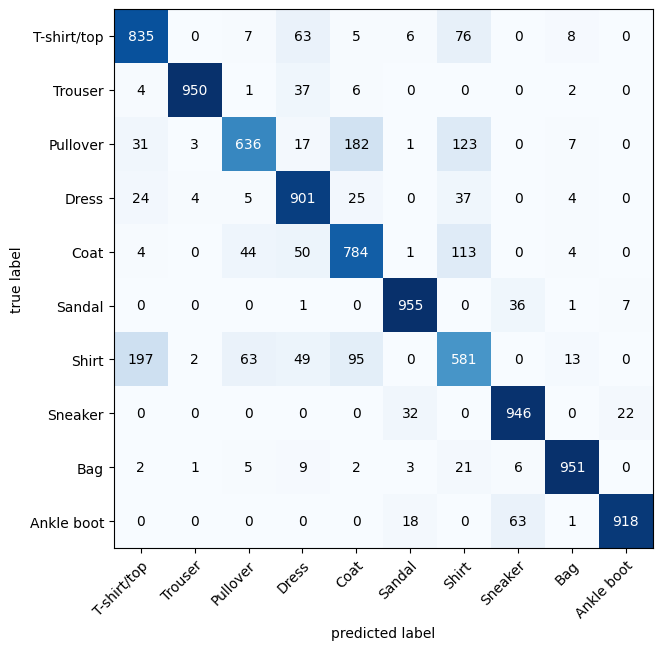

In [45]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task= "multiclass", num_classes= len(class_names))
confmat_tensor = confmat(preds= y_preds, target= test_data.targets)

fix, ax = plot_confusion_matrix(
    conf_mat= confmat_tensor.numpy(),
    class_names = class_names,
    figsize = (10,7)
)